# Implementation von annotation_example3.txt

In [1]:
import math
import numpy as np
import random as rd
import pandas as pd
from scipy import stats 

import matplotlib.pyplot as plt
import matplotlib as mat
import holoviews as hv

import vaex as vaex
import vaex.jupyter.model as vjm

import seaborn as sns

import time


## Die Daten werden hier eingelesen.
###### Mit Übergabe als <class 'vaex.dataframe.DataFrameArrays'> mit Ausgabe der dafür benötigten Zeit

Hier wurde die Datei über Vaex importiert und beim back_value gab es eine kleine Nachbereitung im Namen, da scheinbar mit dem Namen aus der letzten Spalte es zu Komplikationen kommt und das unabhängig davon dass wir hier Vaex verwenden, dies war nämlich auch beim Importieren mit Pandas auch so.

In [2]:
start_proc = time.process_time()

df = vaex.from_csv(
    '/Users/samel/Documents/Hochschule/aktuelles Semester/03. Projekt zur Datenanalyse/Datein/annotation_example3.txt',
    sep=";",
    header=0
    )

df.rename(df.get_column_names()[6], 'backvalue')

ende_proc = time.process_time()
print('Benötigte Systemzeit: {:5.3f}s'.format(ende_proc-start_proc),'\n\nDie Länge des Datensatzes beträgt:', len(df))

df


Benötigte Systemzeit: 8.674s 

Die Länge des Datensatzes beträgt: 5314560


#,pos_id,barcode,run_id,test_date,sign,value,backvalue
0,'1001200171739','100129017HD',10,'2017-07-07 03:07','s',88.33,131.05
1,'1001200171741','100129017HD',10,'2017-07-07 03:07','s',98.66,95.69
2,'1001200171742','100129017HD',10,'2017-07-07 03:07','s',35.03,70.9
3,'1001200171743','100129017HD',10,'2017-07-07 03:07','s',99.09,79.79
4,'1001200171744','100129017HD',10,'2017-07-07 03:07','s',82.09,143.5
...,...,...,...,...,...,...,...
"5,314,555",'1002000172921','100209017HD',9,'2017-07-07 09:07','s',88.9,128.91
"5,314,556",'1002401401231','100249140HD',9,'2017-07-07 09:07','s',93.52,91.56
"5,314,557",'1002401402813','100249140HD',9,'2017-07-07 09:07','s',88.53,93.61
"5,314,558",'1BCS600562415','1BCS6Y056LD',16,'2017-08-23 09:08','s',89.24,144.05


## Hier sollen die Dateien in Kategorien aufgeteilt werden
##### Nebenbei werden die Dateien mit den Variablen in 'df_zahl_ohne_f' übergeben, die die Datei ohne die Werte der Kategorie 'f' besteht und verwendet werden soll.

In [3]:
f = df[df.sign == 'f'] # f => failure (ein Problem mit einem der Geräte)

n = df[df.sign == 'n'] # n => neutral (nur Lösungsmittel, keine Substanz)

p = df[df.sign == 'p'] # p => positiv (kontrolle mit -max- Effekt, bzw. verschiede Konzentrationen -> DWK)

z = df[df.sign == 'z'] # z => zero (negative kontrolle, oder zweite kontrolle, ditto)

s = df[df.sign == 's'] # s => substanz (getestetes kleines chem. Molekül)


In [4]:
print('Länge des gesamten Datensatzes aus annotation_example3.txt:', len(df), '\n', '\n')
print('Länge der Kategorie f:', len(f), '\n')
print('Länge der Kategorie n:', len(n), '\n')
print('Länge der Kategorie p:', len(p), '\n')
print('Länge der Kategorie z:', len(z), '\n')
print('Länge der Kategorie s:', len(s), '\n')

print("Wobei wir die Kategorie 'f' vernachläsigen werden, da es sich hierbei um Gerätefehler handelt:")
print( len(df), '-' ,len(df[df.sign == 'f']), ' =', len(s) + len(z) + len(p) + len(n))


Länge des gesamten Datensatzes aus annotation_example3.txt: 5314560 
 

Länge der Kategorie f: 164522 

Länge der Kategorie n: 880350 

Länge der Kategorie p: 7744 

Länge der Kategorie z: 3872 

Länge der Kategorie s: 4258072 

Wobei wir die Kategorie 'f' vernachläsigen werden, da es sich hierbei um Gerätefehler handelt:
5314560 - 164522  = 5150038


Hier werden Boplots geplottet.

In [7]:
datei = df.to_pandas_df(['pos_id', 'barcode', 'run_id', 'test_date', 'sign', 'value', 'backvalue'])
datei


,pos_id,barcode,run_id,test_date,sign,value,backvalue
0,1001200171739,100129017HD,10,2017-07-07 03:07,s,88.33,131.05
1,1001200171741,100129017HD,10,2017-07-07 03:07,s,98.66,95.69
2,1001200171742,100129017HD,10,2017-07-07 03:07,s,35.03,70.90
3,1001200171743,100129017HD,10,2017-07-07 03:07,s,99.09,79.79
4,1001200171744,100129017HD,10,2017-07-07 03:07,s,82.09,143.50
...,...,...,...,...,...,...,...
5314555,1002000172921,100209017HD,9,2017-07-07 09:07,s,88.90,128.91
5314556,1002401401231,100249140HD,9,2017-07-07 09:07,s,93.52,91.56
5314557,1002401402813,100249140HD,9,2017-07-07 09:07,s,88.53,93.61
5314558,1BCS600562415,1BCS6Y056LD,16,2017-08-23 09:08,s,89.24,144.05


In [8]:
f = datei[ (datei['sign'] == 'f')].index

datei.drop(f, inplace=True)


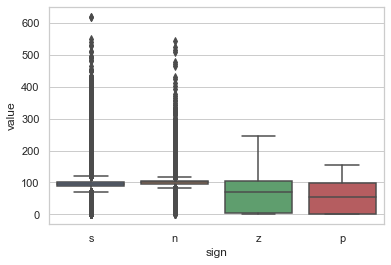

In [9]:
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x="sign", y="value", data=datei)

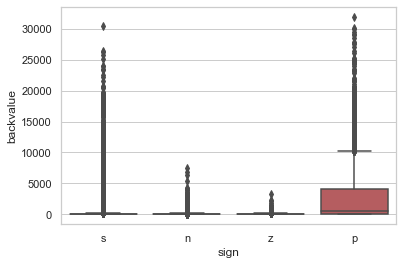

In [10]:
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x="sign", y="backvalue", data=datei)

## Inteervalle festlegen, um zukünftig Ausreißer entfernen zu können.
 
### Intervalsgrenzen bestimmen
Die Intervalle beziehen sich auf die jeweilige Kategorie (n, p, z, s).

In [11]:
print('Die Intervalle sind auf die jeweiligen signs bezogen und dem entsprechenden Feature, jedoch haben diese nicht den selben Intervall, was bei der Modelierung später angepasst werden muss:\n')

n_stdValue = n.std('value')
n_stdBackvalue = n.std('backvalue')
n_meanValue = n.mean('value')
n_meanBackvalue = n.mean('backvalue')

n_ValueGrenzen = ( n_meanValue - (3 * n_stdValue),
                    n_meanValue + (3 * n_stdValue) )

n_BackvalueGrenzen = ( n_meanBackvalue - (3 * n_stdBackvalue),
                        n_meanBackvalue + (3 * n_stdBackvalue) )

print('n:', '\n', 'VALUE:', n_ValueGrenzen, 'BACK_VALUE:', n_BackvalueGrenzen, '\n')



p_stdValue = p.std('value')
p_stdBackvalue = p.std('backvalue')
p_meanValue = p.mean('value')
p_meanBackvalue = p.mean('backvalue')

p_ValueGrenzen = ( p_meanValue - (3 * p_stdValue),
                    p_meanValue + (3 * p_stdValue) )

p_BackvalueGrenzen = ( p_meanBackvalue - (3 * p_stdBackvalue),
                        p_meanBackvalue + (3 * p_stdBackvalue) )

print('p:', '\n', 'VALUE:', p_ValueGrenzen, 'BACK_VALUE:', p_BackvalueGrenzen, '\n')



z_stdValue = z.std('value')
z_stdBackvalue = z.std('backvalue')
z_meanValue = z.mean('value')
z_meanBackvalue = z.mean('backvalue')

z_ValueGrenzen = ( z_meanValue - (3 * z_stdValue),
                    z_meanValue + (3 * z_stdValue) )

z_BackvalueGrenzen = ( z_meanBackvalue - (3 * z_stdBackvalue),
                        z_meanBackvalue + (3 * z_stdBackvalue) )

print('z:', '\n', 'VALUE:', z_ValueGrenzen, 'BACK_VALUE:', z_BackvalueGrenzen, '\n')



s_stdValue = s.std('value')
s_stdBackvalue = s.std('backvalue')
s_meanValue = s.mean('value')
s_meanBackvalue = s.mean('backvalue')

s_ValueGrenzen = ( s_meanValue - (3 * s_stdValue),
                    s_meanValue + (3 * s_stdValue) )

s_BackvalueGrenzen = ( s_meanBackvalue - (3 * s_stdBackvalue),
                        s_meanBackvalue + (3 * s_stdBackvalue) )

print('s:', '\n', 'VALUE:', s_ValueGrenzen, 'BACK_VALUE:', s_BackvalueGrenzen, '\n')

Die Intervalle sind auf die jeweiligen signs bezogen und dem entsprechenden Feature, jedoch haben diese nicht den selben Intervall, was bei der Modelierung später angepasst werden muss:

n: 
 VALUE: (67.79281497978272, 132.71558883688118) BACK_VALUE: (-86.29620736649812, 308.5234996934132) 

p: 
 VALUE: (-89.28200489630308, 191.30684993762532) BACK_VALUE: (-10235.07286609486, 16227.17839553701) 

z: 
 VALUE: (-86.97366500628132, 204.092709427769) BACK_VALUE: (-236.47778804234548, 435.3835421745769) 

s: 
 VALUE: (34.632177276315986, 151.129811708368) BACK_VALUE: (-410.9874897252927, 602.2923863216953) 



Entsprechend der Grenzen Bereinigen

In [68]:
"""
n_cleaned = n[(n['value'] <= n_ValueGrenzen[1] )
              & (n['value'] >= n_ValueGrenzen[0] )
              & (n['backvalue'] <= n_BackvalueGrenzen[1] )
              & (n['backvalue'] >= n_BackvalueGrenzen[0] )
             ]

print('n:', len(n), '=> n_cleaned:', len(n_cleaned), '\n')


p_cleaned = p[(p['value'] <= p_ValueGrenzen[1] )
              & (p['value'] >= p_ValueGrenzen[0] )
              & (p['backvalue'] <= p_BackvalueGrenzen[1] )
              & (p['backvalue'] >= p_BackvalueGrenzen[0] )
             ]

print('p:', len(p), '=> p_cleaned:', len(p_cleaned), '\n')


z_cleaned = z[(z['value'] <= z_ValueGrenzen[1] )
              & (z['value'] >= z_ValueGrenzen[0] )
              & (z['backvalue'] <= z_BackvalueGrenzen[1] )
              & (z['backvalue'] >= z_BackvalueGrenzen[0] )
             ]

print('z:', len(z), '=> z_cleaned:', len(z_cleaned), '\n')


s_cleaned = s[(s['value'] <= s_ValueGrenzen[1] )
              & (s['value'] >= s_ValueGrenzen[0] )
              & (s['backvalue'] <= s_BackvalueGrenzen[1] )
              & (s['backvalue'] >= s_BackvalueGrenzen[0] )
             ]

print('s:', len(s), '=> s_cleaned:', len(s_cleaned), '\n\n')

df_cleaned = s_cleaned.concat(n_cleaned)
df_cleaned = df_cleaned.concat(z_cleaned)
df_cleaned = df_cleaned.concat(p_cleaned)

print('result. Gesam.:',
      len(df), 
      '=> result. clean Gesam.:', 
      len(df_cleaned),
      '\n'
     )
"""


n_cleaned = n[(n['value'] <= 200 )
              & (n['value'] >= 0 )
              & (n['backvalue'] <= 2000 )
              & (n['backvalue'] >= 0 )
             ]

print('n:', len(n), '=> n_cleaned:', len(n_cleaned), '\n')


p_cleaned = p[(p['value'] <= 200 )
              & (p['value'] >= 0 )
              & (p['backvalue'] <= 2000 )
              & (p['backvalue'] >= 0 )
             ]

print('p:', len(p), '=> p_cleaned:', len(p_cleaned), '\n')


z_cleaned = z[(z['value'] <= 200 )
              & (z['value'] >= 0 )
              & (z['backvalue'] <= 2000 )
              & (z['backvalue'] >= 0 )
             ]

print('z:', len(z), '=> z_cleaned:', len(z_cleaned), '\n')


s_cleaned = s[(s['value'] <= 200 )
              & (s['value'] >= 0 )
              & (s['backvalue'] <= 2000 )
              & (s['backvalue'] >= 0 )
             ]

print('s:', len(s), '=> s_cleaned:', len(s_cleaned), '\n\n')

df_cleaned = s_cleaned.concat(n_cleaned)
df_cleaned = df_cleaned.concat(z_cleaned)
df_cleaned = df_cleaned.concat(p_cleaned)

print('result. Gesam.:',
      len(df), 
      '=> result. clean Gesam.:', 
      len(df_cleaned),
      '\n'
     )


n: 880350 => n_cleaned: 879840 

p: 7744 => p_cleaned: 4645 

z: 3872 => z_cleaned: 3866 

s: 4258072 => s_cleaned: 4251083 


result. Gesam.: 5314560 => result. clean Gesam.: 5139434 



Boxplot zur bereinigten Form:

In [62]:
bereinigte_datei = df_cleaned.to_pandas_df(['pos_id', 'barcode', 'run_id', 'test_date', 'sign', 'value', 'backvalue'])
bereinigte_datei


,pos_id,barcode,run_id,test_date,sign,value,backvalue
0,1001200171739,100129017HD,10,2017-07-07 03:07,s,88.33,131.05
1,1001200171741,100129017HD,10,2017-07-07 03:07,s,98.66,95.69
2,1001200171742,100129017HD,10,2017-07-07 03:07,s,35.03,70.90
3,1001200171743,100129017HD,10,2017-07-07 03:07,s,99.09,79.79
4,1001200171744,100129017HD,10,2017-07-07 03:07,s,82.09,143.50
...,...,...,...,...,...,...,...
5133289,1D75707351503,1D7570735AI,13,2017-07-21 07:07,p,99.20,56.92
5133290,1D75707351504,1D7570735AI,13,2017-07-21 07:07,p,110.44,151.61
5133291,1D75707351601,1D7570735AI,13,2017-07-21 07:07,p,101.06,127.07
5133292,1D75707351602,1D7570735AI,13,2017-07-21 07:07,p,92.68,215.14


In [63]:
f = bereinigte_datei[ (bereinigte_datei['sign'] == 'f')].index

bereinigte_datei.drop(f, inplace=True)

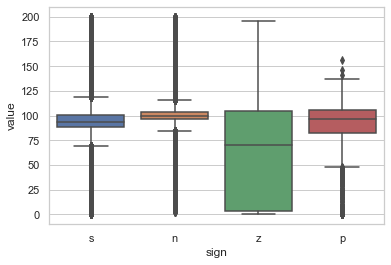

In [64]:
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x="sign", y="value", data=bereinigte_datei)

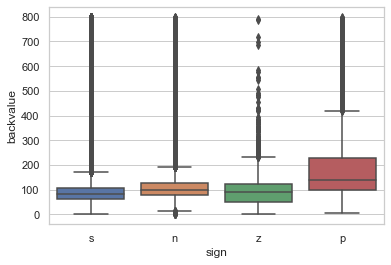

In [65]:
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x="sign", y="backvalue", data=bereinigte_datei)

Erneute Bereinigung um eine gemiensame Grenzen zu finden:

In [69]:
df_cleaned_stdValue = df_cleaned.std('value')
df_cleaned_stdBackvalue = df_cleaned.std('backvalue')
df_cleaned_meanValue = df_cleaned.mean('value')
df_cleaned_meanBackvalue = df_cleaned.mean('backvalue')

df_cleaned_ValueGrenzen = ( df_cleaned_meanValue - (3 * df_cleaned_stdValue),
                           df_cleaned_meanValue + (3 * df_cleaned_stdValue) )

df_cleaned_BackvalueGrenzen = ( df_cleaned_meanBackvalue - (3 * df_cleaned_stdBackvalue),
                               df_cleaned_meanBackvalue + (3 * df_cleaned_stdBackvalue) )

print('df_cleaned:', '\n', 'VALUE:', df_cleaned_ValueGrenzen, 'BACK_VALUE:', df_cleaned_BackvalueGrenzen, '\n')

df_cleaned_scaled = df_cleaned[(df_cleaned['value'] <= 200 )
                               & (df_cleaned['value'] >= 0 )
                               & (df_cleaned['backvalue'] <= 2000 )
                               & (df_cleaned['backvalue'] >= 0 )
             ]

print('df_cleaned:', len(df_cleaned), '=> df_cleaned_scaled:', len(df_cleaned_scaled), '\n')


df_cleaned: 
 VALUE: (40.21118500105888, 147.8606910654426) BACK_VALUE: (-105.41441042808016, 296.59037156310217) 

df_cleaned: 5139434 => df_cleaned_scaled: 5139434 



In [70]:
n_cleaned_scaled = df_cleaned_scaled[df_cleaned_scaled.sign == 'n']

p_cleaned_scaled = df_cleaned_scaled[df_cleaned_scaled.sign == 'p']

z_cleaned_scaled = df_cleaned_scaled[df_cleaned_scaled.sign == 'z']

s_cleaned_scaled = df_cleaned_scaled[df_cleaned_scaled.sign == 's']


## Plots

In [5]:
print('Die Intervalle sind auf die jeweiligen signs bezogen und dem entsprechenden Feature, jedoch haben diese nicht den selben Intervall, was bei der Modelierung später angepasst werden muss:\n')

n_our_ValueGrenzen = ( 0, 200 )

n_our_BackvalueGrenzen = ( 0, 20000 )

print('n_Intervall:', '\n', 'VALUE:', n_our_ValueGrenzen, 'BACK_VALUE:', n_our_BackvalueGrenzen, '\n')


p_our_ValueGrenzen = ( 0, 200 )

p_our_BackvalueGrenzen = ( 0, 20000 )

print('p_Intervall:', '\n', 'VALUE:', p_our_ValueGrenzen, 'BACK_VALUE:', p_our_BackvalueGrenzen, '\n')


z_our_ValueGrenzen = ( 0, 200 )

z_our_BackvalueGrenzen = ( 0, 20000 )

print('z_Intervall:', '\n', 'VALUE:', z_our_ValueGrenzen, 'BACK_VALUE:', z_our_BackvalueGrenzen, '\n')


s_our_ValueGrenzen = ( 0, 200 )

s_our_BackvalueGrenzen = ( 0, 20000 )

print('s_Intervall:', '\n', 'VALUE:', s_our_ValueGrenzen, 'BACK_VALUE:', s_our_BackvalueGrenzen, '\n')


our_n = n[(n['value'] < n_our_ValueGrenzen[1] )
          & (n['value'] >= n_our_ValueGrenzen[0] )
          & (n['backvalue'] < n_our_BackvalueGrenzen[1] )
          & (n['backvalue'] >= n_our_BackvalueGrenzen[0] )
         ]

print('n:', len(n), '=> n_cleaned:', len(our_n), '\n')


our_p = p[(p['value'] < p_our_ValueGrenzen[1] )
          & (p['value'] >= p_our_ValueGrenzen[0] )
          & (p['backvalue'] < p_our_BackvalueGrenzen[1] )
          & (p['backvalue'] >= p_our_BackvalueGrenzen[0] )
         ]

print('p:', len(p), '=> p_cleaned:', len(our_p), '\n')


our_z = z[(z['value'] < z_our_ValueGrenzen[1] )
          & (z['value'] >= z_our_ValueGrenzen[0] )
          & (z['backvalue'] < z_our_BackvalueGrenzen[1] )
          & (z['backvalue'] >= z_our_BackvalueGrenzen[0] )
         ]

print('z:', len(z), '=> z_cleaned:', len(our_z), '\n')


our_s = s[(s['value'] < s_our_ValueGrenzen[1] )
          & (s['value'] >= s_our_ValueGrenzen[0] )
          & (s['backvalue'] < s_our_BackvalueGrenzen[1] )
          & (s['backvalue'] >= s_our_BackvalueGrenzen[0] )
         ]

print('s:', len(s), '=> s_cleaned:', len(our_s), '\n\n')

our_df = our_n.concat(our_p)
#df_cleaned = df_cleaned.concat(z_cleaned)
our_df = our_df.concat(our_s)

print('result. Gesam.:',
      len(df), 
      '=> result. clean Gesam.:', 
      len(our_df),
      '\n\n\n'
     )

Die Intervalle sind auf die jeweiligen signs bezogen und dem entsprechenden Feature, jedoch haben diese nicht den selben Intervall, was bei der Modelierung später angepasst werden muss:

n_Intervall: 
 VALUE: (0, 200) BACK_VALUE: (0, 20000) 

p_Intervall: 
 VALUE: (0, 200) BACK_VALUE: (0, 20000) 

z_Intervall: 
 VALUE: (0, 200) BACK_VALUE: (0, 20000) 

s_Intervall: 
 VALUE: (0, 200) BACK_VALUE: (0, 20000) 

n: 880350 => n_cleaned: 879908 

p: 7744 => p_cleaned: 7701 

z: 3872 => z_cleaned: 3869 

s: 4258072 => s_cleaned: 4254310 


result. Gesam.: 5314560 => result. clean Gesam.: 5141919 





/Users/samel/miniconda3/envs/Projekt_zur_Datenanalyse/lib/python3.8/site-packages/vaex/viz/mpl.py:311: UserWarning: `plot` is deprecated and it will be removed in version 5.x. Please `df.viz.heatmap` instead.
  warnings.warn('`plot` is deprecated and it will be removed in version 5.x. Please `df.viz.heatmap` instead.')


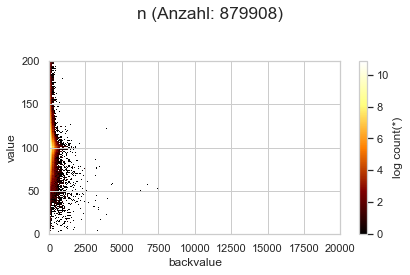

/Users/samel/miniconda3/envs/Projekt_zur_Datenanalyse/lib/python3.8/site-packages/vaex/viz/mpl.py:311: UserWarning: `plot` is deprecated and it will be removed in version 5.x. Please `df.viz.heatmap` instead.
  warnings.warn('`plot` is deprecated and it will be removed in version 5.x. Please `df.viz.heatmap` instead.')


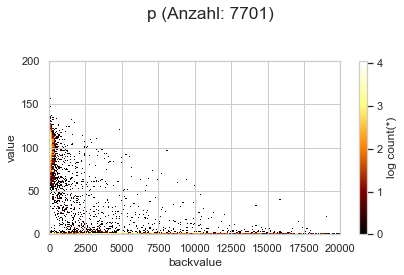

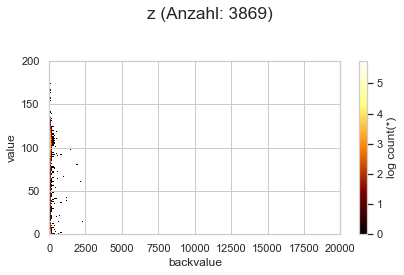

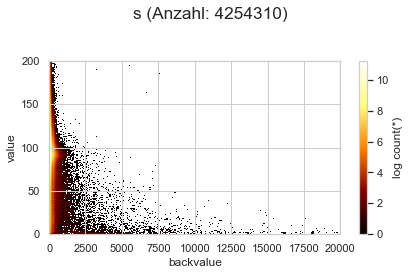

Benötigte Systemzeit: 1.826s


In [6]:
start_proc = time.process_time()
sns.set_theme(style="whitegrid")

# n_plot
n.plot(n.backvalue,
       n.value,
       limits=[[0, 20000],
               [0, 200]],
       f='log',
       title='n (Anzahl: '+ str( len(our_n) ) + ')'
      )
#plt.title('n (Anzahl: '+ str( len(our_n) ) + ')')
plt.show()

# p_plot
p.plot(p.backvalue,
       p.value,
       limits=[[0, 20000],
               [0, 200]],
       f='log',
       title='p (Anzahl: '+ str( len(our_p) ) + ')'
      )
#plt.title('p (Anzahl: '+ str( len(our_p) ) + ')')
plt.show()

# z_plot
z.plot(z.backvalue,
       z.value,
       limits=[[0, 20000],
               [0, 200]],
       f='log',
       title='z (Anzahl: '+ str( len(our_z) ) + ')'
      )
#plt.title('z (Anzahl: '+ str( len(our_z) ) + ')')
plt.show()

# s_plot
s.plot(s.backvalue,
       s.value,
       limits=[[0, 20000],
               [0, 200]],
       f='log',
       title='s (Anzahl: '+ str( len(our_s) ) + ')'
      )
#plt.title('s (Anzahl: '+ str( len(our_s) ) + ')')


plt.show()

ende_proc = time.process_time()
print('Benötigte Systemzeit: {:5.3f}s'.format(ende_proc-start_proc))


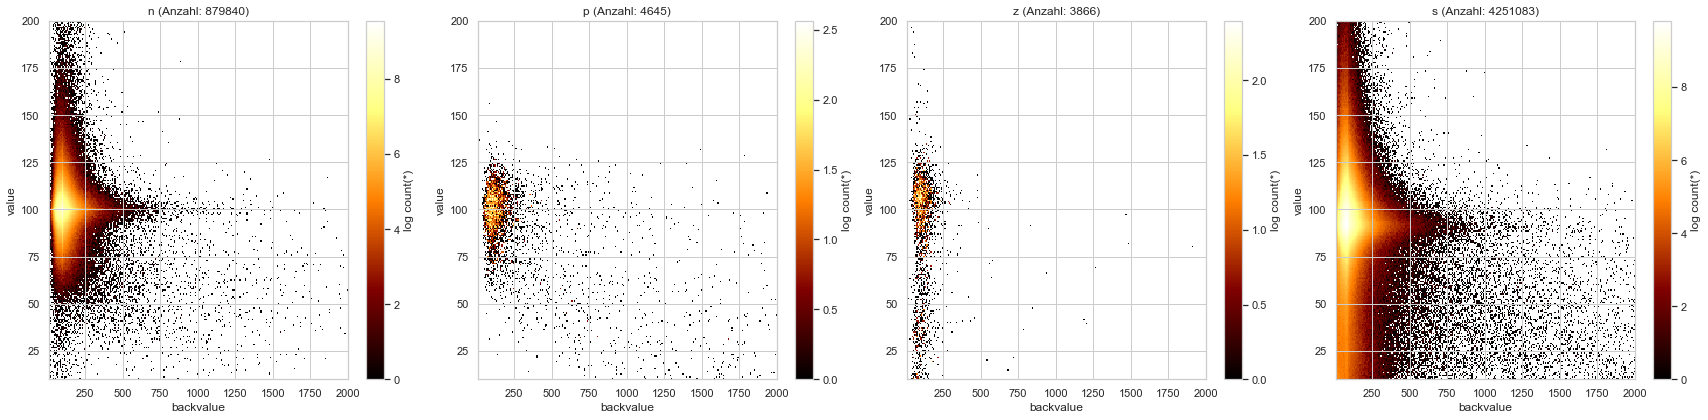

Benötigte Systemzeit: 1.561s


In [72]:
start_proc = time.process_time()
sns.set_theme(style="whitegrid")

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,6))
plt.sca(ax1)
# code für 1te heatmap
n_cleaned_scaled.plot(n_cleaned_scaled.backvalue,
                      n_cleaned_scaled.value,
                      #what=np.log(vaex.stat.count(n_cleaned_scaled.value)),
                      limits=[[10, 2000],
                              [10, 200]],
                      f='log',
                      #title='n'
                     )
plt.title('n (Anzahl: '+ str( len(n_cleaned_scaled) ) + ')')


plt.sca(ax2)
# code für 2te heatmap
p_cleaned_scaled.plot(p_cleaned_scaled.backvalue,
                      p_cleaned_scaled.value,
                      #what=np.log(vaex.stat.count(p_cleaned_scaled.value)),
                      limits=[[10, 2000],
                              [10, 200]],
                      f='log',
                      #title='p'
                     )
plt.title('p (Anzahl: '+ str( len(p_cleaned_scaled) ) + ')')


plt.sca(ax3)
# code für 3te heatmap
z_cleaned_scaled.plot(z_cleaned_scaled.backvalue,
                      z_cleaned_scaled.value,
                      #what=np.log(vaex.stat.count(z_cleaned_scaled.value)),
                      limits=[[10, 2000],
                              [10, 200]],
                      f='log',
                      #title='z'
                     )
plt.title('z (Anzahl: '+ str( len(z_cleaned_scaled) ) + ')')


plt.sca(ax4)
# code für 4te heatmap
s_cleaned_scaled.plot(s_cleaned_scaled.backvalue,
                      s_cleaned_scaled.value,
                      #what=np.log(vaex.stat.count(s_cleaned_scaled.value)),
                      limits=[[10, 2000],
                              [10, 200]],
                      f='log',
                      #title='s'
                     )
plt.title('s (Anzahl: '+ str( len(s_cleaned_scaled) ) + ')')


plt.show()

ende_proc = time.process_time()
print('Benötigte Systemzeit: {:5.3f}s'.format(ende_proc-start_proc))


/Users/samel/miniconda3/envs/Projekt_zur_Datenanalyse/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


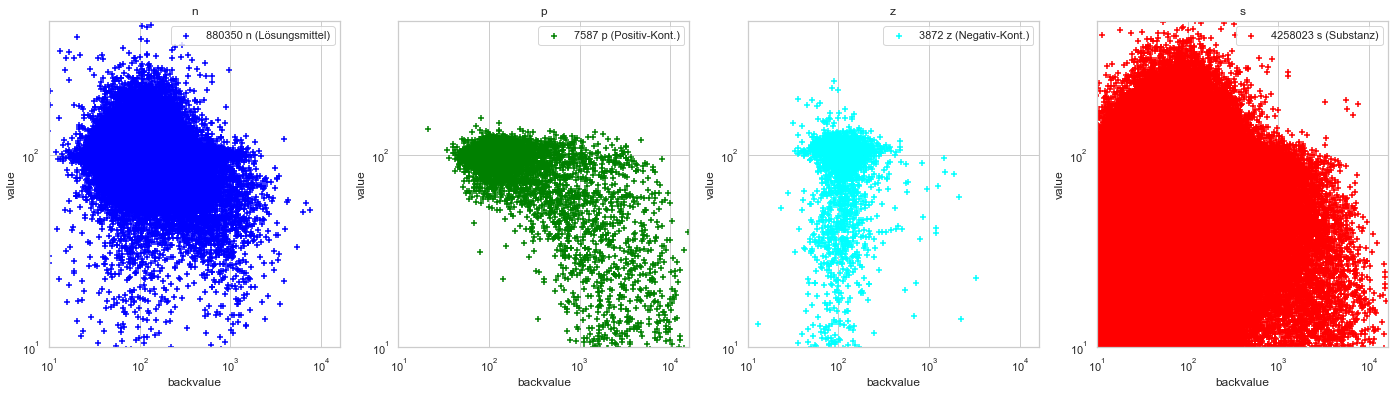

Benötigte Systemzeit: 48.263s


In [17]:
start_proc = time.process_time()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,6))

plt.sca(ax1)
# code für 1te heatmap
plt.scatter(n_cleaned_scaled.backvalue.values,
            n_cleaned_scaled.value.values,
            marker='+',
            color='blue',
            label=str(len(n_cleaned_scaled))+' n (Lösungsmittel)',
            alpha=1
           )
plt.xlim(10, p_BackvalueGrenzen[1])
plt.ylim(10, 500)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('backvalue')
plt.ylabel('value')
plt.legend()
plt.title('n')


plt.sca(ax2)
# code für 2te heatmap
plt.scatter(p_cleaned_scaled.backvalue.values,
            p_cleaned_scaled.value.values,
            marker='+',
            color='green',
            label=str(len(p_cleaned_scaled))+' p (Positiv-Kont.)',
            alpha=1
           )
plt.xlim(10, p_BackvalueGrenzen[1])
plt.ylim(10, 500)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('backvalue')
plt.ylabel('value')
plt.legend()
plt.title('p')


plt.sca(ax3)
# code für 3te heatmap
plt.scatter(z_cleaned_scaled.backvalue.values,
            z_cleaned_scaled.value.values,
            marker='+',
            color='cyan',
            label=str(len(z_cleaned_scaled))+' z (Negativ-Kont.)',
            alpha=1
           )
plt.xlim(10, p_BackvalueGrenzen[1])
plt.ylim(10, 500)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('backvalue')
plt.ylabel('value')
plt.legend()
plt.title('z')


plt.sca(ax4)
# code für 4te heatmap
plt.scatter(s_cleaned_scaled.backvalue.values,
            s_cleaned_scaled.value.values,
            marker='+',
            color='red',
            label=str(len(s_cleaned_scaled))+' s (Substanz)',
            alpha=1
           )
plt.xlim(10, p_BackvalueGrenzen[1])
plt.ylim(10, 500)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('backvalue')
plt.ylabel('value')
plt.legend()
plt.title('s')

plt.show()

ende_proc = time.process_time()
print('Benötigte Systemzeit: {:5.3f}s'.format(ende_proc-start_proc))


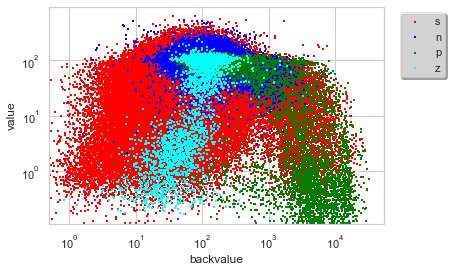

Benötigte Systemzeit: 27.096s


In [66]:
start_proc = time.process_time()
fig = plt.figure()

ax1 = plt.gca()
ax1.scatter(s.backvalue.values,
            s.value.values,
            4,
            marker="+",
            color='red',
            label='s',
            alpha=1
           )
#ax1.set_xlim(backvalue_start, p_BackvalueGrenzen[1])
#ax1.set_ylim(value_start, z_ValueGrenzen[1])
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('backvalue')
ax1.set_ylabel('value')
#ax1.legend('s')



ax2 = plt.gca()
ax2.scatter(n.backvalue.values,
            n.value.values,
            4,
            marker="+",
            color='blue',
            label='n',
            alpha=1
           )
#ax2.set_xlim(backvalue_start, p_BackvalueGrenzen[1])
#ax2.set_ylim(value_start, z_ValueGrenzen[1])
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlabel('backvalue')
ax2.set_ylabel('value')
#ax2.legend('n')



ax3 = plt.gca()
ax3.scatter(p.backvalue.values,
            p.value.values,
            4,
            marker="+",
            color='green',
            label='p',
            alpha=1
           )
#ax3.set_xlim(backvalue_start, p_BackvalueGrenzen[1])
#ax3.set_ylim(value_start, z_ValueGrenzen[1])
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_xlabel('backvalue')
ax3.set_ylabel('value')
#ax3.legend('p')



ax4 = plt.gca()
ax4.scatter(z.backvalue.values,
            z.value.values,
            4,
            marker="+",
            color='cyan',
            label='z',
            alpha=1
           )
#ax4.set_xlim(backvalue_start, p_BackvalueGrenzen[1])
#ax4.set_ylim(value_start, z_ValueGrenzen[1])
ax4.set_yscale('log')
ax4.set_xscale('log')
ax4.set_xlabel('backvalue')
ax4.set_ylabel('value')
#ax4.legend('z')

#legend((ax1, ax2, ax3, ax4), ('s','n', 'p', 'z'))
leg = plt.legend(loc='best', bbox_to_anchor=(1.2, 1), shadow=True)
leg.get_frame().set_alpha(0.5)

plt.show()

ende_proc = time.process_time()
print('Benötigte Systemzeit: {:5.3f}s'.format(ende_proc-start_proc))

In [54]:
value_start = 10**-2
backvalue_start = 10**-1

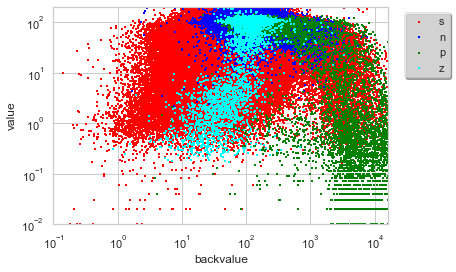

Benötigte Systemzeit: 29.232s


In [57]:
start_proc = time.process_time()
fig = plt.figure()

ax1 = plt.gca()
ax1.scatter(s_cleaned_scaled.backvalue.values,
            s_cleaned_scaled.value.values,
            4,
            marker="+",
            color='red',
            label='s',
            alpha=1
           )
ax1.set_xlim(backvalue_start, p_BackvalueGrenzen[1])
ax1.set_ylim(value_start, z_ValueGrenzen[1])
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('backvalue')
ax1.set_ylabel('value')
#ax1.legend('s')



ax2 = plt.gca()
ax2.scatter(n_cleaned_scaled.backvalue.values,
            n_cleaned_scaled.value.values,
            4,
            marker="+",
            color='blue',
            label='n',
            alpha=1
           )
ax2.set_xlim(backvalue_start, p_BackvalueGrenzen[1])
ax2.set_ylim(value_start, z_ValueGrenzen[1])
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlabel('backvalue')
ax2.set_ylabel('value')
#ax2.legend('n')



ax3 = plt.gca()
ax3.scatter(p_cleaned_scaled.backvalue.values,
            p_cleaned_scaled.value.values,
            4,
            marker="+",
            color='green',
            label='p',
            alpha=1
           )
ax3.set_xlim(backvalue_start, p_BackvalueGrenzen[1])
ax3.set_ylim(value_start, z_ValueGrenzen[1])
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_xlabel('backvalue')
ax3.set_ylabel('value')
#ax3.legend('p')



ax4 = plt.gca()
ax4.scatter(z_cleaned_scaled.backvalue.values,
            z_cleaned_scaled.value.values,
            4,
            marker="+",
            color='cyan',
            label='z',
            alpha=1
           )
ax4.set_xlim(backvalue_start, p_BackvalueGrenzen[1])
ax4.set_ylim(value_start, z_ValueGrenzen[1])
ax4.set_yscale('log')
ax4.set_xscale('log')
ax4.set_xlabel('backvalue')
ax4.set_ylabel('value')
#ax4.legend('z')

#legend((ax1, ax2, ax3, ax4), ('s','n', 'p', 'z'))
leg = plt.legend(loc='best', bbox_to_anchor=(1.2, 1), shadow=True)
leg.get_frame().set_alpha(0.5)

plt.show()

ende_proc = time.process_time()
print('Benötigte Systemzeit: {:5.3f}s'.format(ende_proc-start_proc))


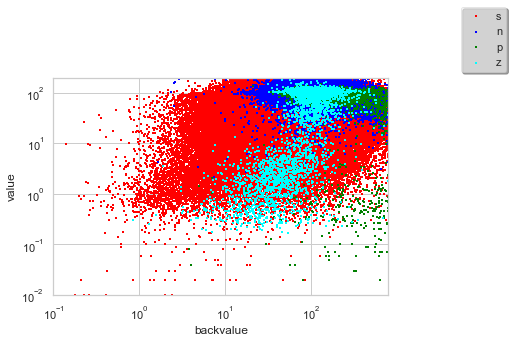

Benötigte Systemzeit: 119.638s


In [59]:
_proc = time.process_time()
fig = plt.figure()

ax1 = plt.gca()
ax1.scatter(s_cleaned_scaled.backvalue.values,
            s_cleaned_scaled.value.values,
            4,
            marker="+",
            color='red',
            label='s',
            alpha=1
           )
ax1.set_xlim(backvalue_start, 800)
ax1.set_ylim(value_start, 200)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('backvalue')
ax1.set_ylabel('value')
#ax1.legend('s')



ax2 = plt.gca()
ax2.scatter(n_cleaned_scaled.backvalue.values,
            n_cleaned_scaled.value.values,
            4,
            marker="+",
            color='blue',
            label='n',
            alpha=1
           )
ax2.set_xlim(backvalue_start, 800)
ax2.set_ylim(value_start, 200)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlabel('backvalue')
ax2.set_ylabel('value')
#ax2.legend('n')



ax3 = plt.gca()
ax3.scatter(p_cleaned_scaled.backvalue.values,
            p_cleaned_scaled.value.values,
            4,
            marker="+",
            color='green',
            label='p',
            alpha=1
           )
ax3.set_xlim(backvalue_start, 800)
ax3.set_ylim(value_start, 200)
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_xlabel('backvalue')
ax3.set_ylabel('value')
#ax3.legend('p')



ax4 = plt.gca()
ax4.scatter(z_cleaned_scaled.backvalue.values,
            z_cleaned_scaled.value.values,
            4,
            marker="+",
            color='cyan',
            label='z',
            alpha=1
           )
ax4.set_xlim(backvalue_start, 800)
ax4.set_ylim(value_start, 200)
ax4.set_yscale('log')
ax4.set_xscale('log')
ax4.set_xlabel('backvalue')
ax4.set_ylabel('value')
#ax4.legend('z')

#legend((ax1, ax2, ax3, ax4), ('s','n', 'p', 'z'))
leg = plt.legend(loc='best', bbox_to_anchor=(1.2, 1), shadow=True)
leg.get_frame().set_alpha(0.5)

plt.show()

ende_proc = time.process_time()
print('Benötigte Systemzeit: {:5.3f}s'.format(ende_proc-start_proc))

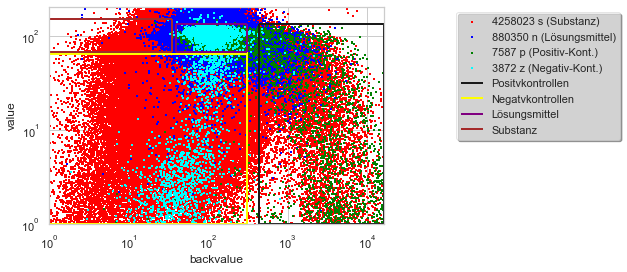

Benötigte Systemzeit: 37.799s


In [35]:
start_proc = time.process_time()
fig = plt.figure()

ax1 = plt.gca()
ax1.scatter(s_cleaned_scaled.backvalue.values,
            s_cleaned_scaled.value.values,
            4,
            marker="+",
            color='red',
            label=str(len(s_cleaned_scaled))+' s (Substanz)',
            alpha=1
           )
ax1.set_xlim(1, p_BackvalueGrenzen[1])
ax1.set_ylim(1, z_ValueGrenzen[1])
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('backvalue')
ax1.set_ylabel('value')
#ax1.legend('s')



ax2 = plt.gca()
ax2.scatter(n_cleaned_scaled.backvalue.values,
            n_cleaned_scaled.value.values,
            4,
            marker="+",
            color='blue',
            label=str(len(n_cleaned_scaled))+' n (Lösungsmittel)',
            alpha=1
           )
ax2.set_xlim(10, p_BackvalueGrenzen[1])
ax2.set_ylim(1, z_ValueGrenzen[1])
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlabel('backvalue')
ax2.set_ylabel('value')
#ax2.legend('n')



ax3 = plt.gca()
ax3.scatter(p_cleaned_scaled.backvalue.values,
            p_cleaned_scaled.value.values,
            4,
            marker="+",
            color='green',
            label=str(len(p_cleaned_scaled))+' p (Positiv-Kont.)',
            alpha=1
           )
ax3.set_xlim(10, p_BackvalueGrenzen[1])
ax3.set_ylim(10, z_ValueGrenzen[1])
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_xlabel('backvalue')
ax3.set_ylabel('value')
#ax3.legend('p')



ax4 = plt.gca()
ax4.scatter(z_cleaned_scaled.backvalue.values,
            z_cleaned_scaled.value.values,
            4,
            marker="+",
            color='cyan',
            label=str(len(z_cleaned_scaled))+' z (Negativ-Kont.)',
            alpha=1
           )
ax4.set_xlim(1, p_BackvalueGrenzen[1])
ax4.set_ylim(1, z_ValueGrenzen[1])
ax4.set_yscale('log')
ax4.set_xscale('log')
ax4.set_xlabel('backvalue')
ax4.set_ylabel('value')
#ax4.legend('z')

# Bereich für p
ax5 = plt.gca()
ax5.vlines(p_BackvalueGrenzen[1], n_ValueGrenzen[1], 0, linestyles ="solid", colors ="k", linewidth=2, label="Positvkontrollen")
ax6 = plt.gca()
ax6.hlines(n_ValueGrenzen[1], z_BackvalueGrenzen[1], p_BackvalueGrenzen[1], linestyles ="solid", colors ="k", linewidth=2)

ax7 = plt.gca()
ax7.vlines(z_BackvalueGrenzen[1], n_ValueGrenzen[1], 0, linestyles ="solid", colors ="k", linewidth=2)
ax8 = plt.gca()
ax8.hlines(1, z_BackvalueGrenzen[1], p_BackvalueGrenzen[1], linestyles ="solid", colors ="k", linewidth=2)


# Bereich für z
ax9 = plt.gca()
ax9.vlines(0, n_ValueGrenzen[0]-4, 0, linestyles ="solid", colors ="yellow", linewidth=2, label="Negatvkontrollen")
ax10 = plt.gca()
ax10.hlines(n_ValueGrenzen[0]-4, 1, n_BackvalueGrenzen[1], linestyles ="solid", colors ="yellow", linewidth=2)

ax11 = plt.gca()
ax11.vlines(n_BackvalueGrenzen[1], n_ValueGrenzen[1]-4, 1, linestyles ="solid", colors ="yellow", linewidth=2)
ax12 = plt.gca()
ax12.hlines(1, 1, n_BackvalueGrenzen[1], linestyles ="solid", colors ="yellow", linewidth=2)


# Bereich für n
ax13 = plt.gca()
ax13.vlines(40, n_ValueGrenzen[1], n_ValueGrenzen[0], linestyles ="solid", colors ="purple", linewidth=2, label="Lösungsmittel")
ax14 = plt.gca()
ax14.hlines(n_ValueGrenzen[1], 40, n_BackvalueGrenzen[1], linestyles ="solid", colors ="purple", linewidth=2)

ax15 = plt.gca()
ax15.vlines(n_BackvalueGrenzen[1], n_ValueGrenzen[1], n_ValueGrenzen[0], linestyles ="solid", colors ="purple", linewidth=2)
ax16 = plt.gca()
ax16.hlines(n_ValueGrenzen[0], 40, n_BackvalueGrenzen[1], linestyles ="solid", colors ="purple", linewidth=2)


# Bereich für s
ax17 = plt.gca()
ax17.vlines(1, n_ValueGrenzen[1], s_ValueGrenzen[1], linestyles ="solid", colors ="brown", linewidth=2, label="Substanz")
ax18 = plt.gca()
ax18.hlines(s_ValueGrenzen[1], 1, 35, linestyles ="solid", colors ="brown", linewidth=2)

ax19 = plt.gca()
ax19.vlines(35, n_ValueGrenzen[0], s_ValueGrenzen[1], linestyles ="solid", colors ="brown", linewidth=2)
ax20 = plt.gca()
ax20.hlines(n_ValueGrenzen[0], 1, 35, linestyles ="solid", colors ="brown", linewidth=2)


#legend((ax1, ax2, ax3, ax4), ('s', 'n', 'p', 'z'))
leg = plt.legend(loc='best', bbox_to_anchor=(1.2, 1), shadow=True)
leg.get_frame().set_alpha(0.5)

plt.show()

ende_proc = time.process_time()
print('Benötigte Systemzeit: {:5.3f}s'.format(ende_proc-start_proc))


Aufgeteilt wieder in Kategorien:

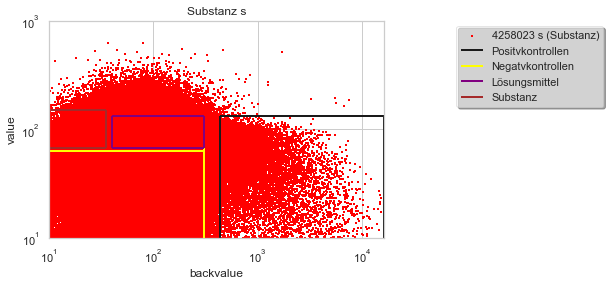

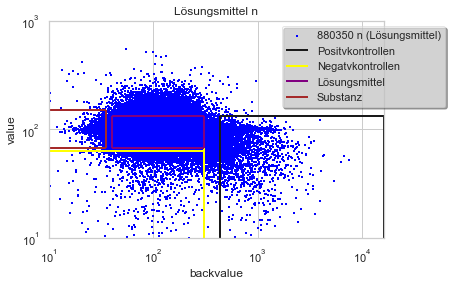

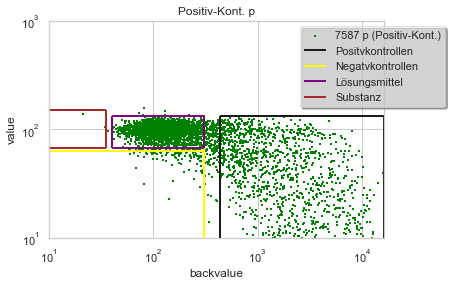

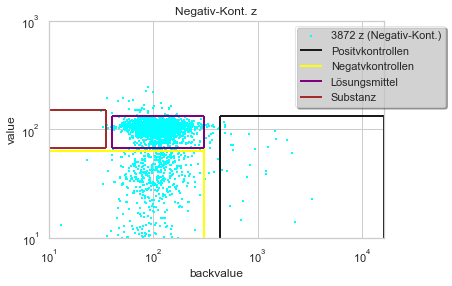

Benötigte Systemzeit: 37.455s


In [32]:
start_proc = time.process_time()

# Substanz plotten
fig = plt.figure()
ax1 = plt.gca()
ax1.scatter(s_cleaned_scaled.backvalue.values,
            s_cleaned_scaled.value.values,
            4,
            marker="+",
            color='red',
            label=str(len(s_cleaned_scaled))+' s (Substanz)',
            alpha=1
           )
ax1.set_xlim(10, p_BackvalueGrenzen[1])
ax1.set_ylim(10, z_ValueGrenzen[1])
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('backvalue')
ax1.set_ylabel('value')
ax1.set_title('Substanz s')

# Bereich für p
ax5 = plt.gca()
ax5.vlines(p_BackvalueGrenzen[1], n_ValueGrenzen[1], 0, linestyles ="solid", colors ="k", linewidth=2, label="Positvkontrollen")
ax6 = plt.gca()
ax6.hlines(n_ValueGrenzen[1], z_BackvalueGrenzen[1], p_BackvalueGrenzen[1], linestyles ="solid", colors ="k", linewidth=2)

ax7 = plt.gca()
ax7.vlines(z_BackvalueGrenzen[1], n_ValueGrenzen[1], 0, linestyles ="solid", colors ="k", linewidth=2)
ax8 = plt.gca()
ax8.hlines(1, z_BackvalueGrenzen[1], p_BackvalueGrenzen[1], linestyles ="solid", colors ="k", linewidth=2)


# Bereich für z
ax9 = plt.gca()
ax9.vlines(0, n_ValueGrenzen[0]-4, 0, linestyles ="solid", colors ="yellow", linewidth=2, label="Negatvkontrollen")
ax10 = plt.gca()
ax10.hlines(n_ValueGrenzen[0]-4, 1, n_BackvalueGrenzen[1], linestyles ="solid", colors ="yellow", linewidth=2)

ax11 = plt.gca()
ax11.vlines(n_BackvalueGrenzen[1], 1, n_ValueGrenzen[1]-4, linestyles ="solid", colors ="yellow", linewidth=2)
ax12 = plt.gca()
ax12.hlines(1, 1, n_BackvalueGrenzen[1], linestyles ="solid", colors ="yellow", linewidth=2)


# Bereich für n
ax13 = plt.gca()
ax13.vlines(40, n_ValueGrenzen[1], n_ValueGrenzen[0], linestyles ="solid", colors ="purple", linewidth=2, label="Lösungsmittel")
ax14 = plt.gca()
ax14.hlines(n_ValueGrenzen[1], 40, n_BackvalueGrenzen[1], linestyles ="solid", colors ="purple", linewidth=2)

ax15 = plt.gca()
ax15.vlines(n_BackvalueGrenzen[1], n_ValueGrenzen[1], n_ValueGrenzen[0], linestyles ="solid", colors ="purple", linewidth=2)
ax16 = plt.gca()
ax16.hlines(n_ValueGrenzen[0], 40, n_BackvalueGrenzen[1], linestyles ="solid", colors ="purple", linewidth=2)

# Bereich für s
ax17 = plt.gca()
ax17.vlines(1, n_ValueGrenzen[1], s_ValueGrenzen[1], linestyles ="solid", colors ="brown", linewidth=2, label="Substanz")
ax18 = plt.gca()
ax18.hlines(s_ValueGrenzen[1], 1, 35, linestyles ="solid", colors ="brown", linewidth=2)

ax19 = plt.gca()
ax19.vlines(35, n_ValueGrenzen[0], s_ValueGrenzen[1], linestyles ="solid", colors ="brown", linewidth=2)
ax20 = plt.gca()
ax20.hlines(n_ValueGrenzen[0], 1, 35, linestyles ="solid", colors ="brown", linewidth=2)


#legend((ax1, ax2, ax3, ax4), ('s', 'n', 'p', 'z'))
leg = plt.legend(loc='best', bbox_to_anchor=(1.2, 1), shadow=True)
leg.get_frame().set_alpha(0.5)

plt.show()


# Lösungmittel plotten
fig = plt.figure()
ax2 = plt.gca()
ax2.scatter(n_cleaned_scaled.backvalue.values,
            n_cleaned_scaled.value.values,
            4,
            marker="+",
            color='blue',
            label=str(len(n_cleaned_scaled))+' n (Lösungsmittel)',
            alpha=1
           )
ax2.set_xlim(10, p_BackvalueGrenzen[1])
ax2.set_ylim(10, 1000)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlabel('backvalue')
ax2.set_ylabel('value')
ax2.set_title('Lösungsmittel n')

# Bereich für p
ax5 = plt.gca()
ax5.vlines(p_BackvalueGrenzen[1], n_ValueGrenzen[1], 0, linestyles ="solid", colors ="k", linewidth=2, label="Positvkontrollen")
ax6 = plt.gca()
ax6.hlines(n_ValueGrenzen[1], z_BackvalueGrenzen[1], p_BackvalueGrenzen[1], linestyles ="solid", colors ="k", linewidth=2)

ax7 = plt.gca()
ax7.vlines(z_BackvalueGrenzen[1], n_ValueGrenzen[1], 0, linestyles ="solid", colors ="k", linewidth=2)
ax8 = plt.gca()
ax8.hlines(1, z_BackvalueGrenzen[1], p_BackvalueGrenzen[1], linestyles ="solid", colors ="k", linewidth=2)


# Bereich für z
ax9 = plt.gca()
ax9.vlines(0, n_ValueGrenzen[0]-4, 0, linestyles ="solid", colors ="yellow", linewidth=2, label="Negatvkontrollen")
ax10 = plt.gca()
ax10.hlines(n_ValueGrenzen[0]-4, 1, n_BackvalueGrenzen[1], linestyles ="solid", colors ="yellow", linewidth=2)

ax11 = plt.gca()
ax11.vlines(n_BackvalueGrenzen[1], n_ValueGrenzen[1]-4, 1, linestyles ="solid", colors ="yellow", linewidth=2)
ax12 = plt.gca()
ax12.hlines(1, 1, n_BackvalueGrenzen[1], linestyles ="solid", colors ="yellow", linewidth=2)


# Bereich für n
ax13 = plt.gca()
ax13.vlines(40, n_ValueGrenzen[1], n_ValueGrenzen[0], linestyles ="solid", colors ="purple", linewidth=2, label="Lösungsmittel")
ax14 = plt.gca()
ax14.hlines(n_ValueGrenzen[1], 40, n_BackvalueGrenzen[1], linestyles ="solid", colors ="purple", linewidth=2)

ax15 = plt.gca()
ax15.vlines(n_BackvalueGrenzen[1], n_ValueGrenzen[1], n_ValueGrenzen[0], linestyles ="solid", colors ="purple", linewidth=2)
ax16 = plt.gca()
ax16.hlines(n_ValueGrenzen[0], 40, n_BackvalueGrenzen[1], linestyles ="solid", colors ="purple", linewidth=2)


# Bereich für s
ax17 = plt.gca()
ax17.vlines(1, n_ValueGrenzen[1], s_ValueGrenzen[1], linestyles ="solid", colors ="brown", linewidth=2, label="Substanz")
ax18 = plt.gca()
ax18.hlines(s_ValueGrenzen[1], 1, 35, linestyles ="solid", colors ="brown", linewidth=2)

ax19 = plt.gca()
ax19.vlines(35, n_ValueGrenzen[0], s_ValueGrenzen[1], linestyles ="solid", colors ="brown", linewidth=2)
ax20 = plt.gca()
ax20.hlines(n_ValueGrenzen[0], 1, 35, linestyles ="solid", colors ="brown", linewidth=2)


#legend((ax1, ax2, ax3, ax4), ('s', 'n', 'p', 'z'))
leg = plt.legend(loc='best', bbox_to_anchor=(1.2, 1), shadow=True)
leg.get_frame().set_alpha(0.5)

plt.show()


# Positiv-Kontrollen plotten
fig = plt.figure()
ax3 = plt.gca()
ax3.scatter(p_cleaned_scaled.backvalue.values,
            p_cleaned_scaled.value.values,
            4,
            marker="+",
            color='green',
            label=str(len(p_cleaned_scaled))+' p (Positiv-Kont.)',
            alpha=1
           )
ax3.set_xlim(10, p_BackvalueGrenzen[1])
ax3.set_ylim(10, 1000)
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_xlabel('backvalue')
ax3.set_ylabel('value')
ax3.set_title('Positiv-Kont. p')

# Bereich für p
ax5 = plt.gca()
ax5.vlines(p_BackvalueGrenzen[1], n_ValueGrenzen[1], 0, linestyles ="solid", colors ="k", linewidth=2, label="Positvkontrollen")
ax6 = plt.gca()
ax6.hlines(n_ValueGrenzen[1], z_BackvalueGrenzen[1], p_BackvalueGrenzen[1], linestyles ="solid", colors ="k", linewidth=2)

ax7 = plt.gca()
ax7.vlines(z_BackvalueGrenzen[1], n_ValueGrenzen[1], 0, linestyles ="solid", colors ="k", linewidth=2)
ax8 = plt.gca()
ax8.hlines(1, z_BackvalueGrenzen[1], p_BackvalueGrenzen[1], linestyles ="solid", colors ="k", linewidth=2)


# Bereich für z
ax9 = plt.gca()
ax9.vlines(0, n_ValueGrenzen[0]-4, 0, linestyles ="solid", colors ="yellow", linewidth=2, label="Negatvkontrollen")
ax10 = plt.gca()
ax10.hlines(n_ValueGrenzen[0]-4, 1, n_BackvalueGrenzen[1], linestyles ="solid", colors ="yellow", linewidth=2)

ax11 = plt.gca()
ax11.vlines(n_BackvalueGrenzen[1], n_ValueGrenzen[1]-4, 1, linestyles ="solid", colors ="yellow", linewidth=2)
ax12 = plt.gca()
ax12.hlines(1, 1, n_BackvalueGrenzen[1], linestyles ="solid", colors ="yellow", linewidth=2)


# Bereich für n
ax13 = plt.gca()
ax13.vlines(40, n_ValueGrenzen[1], n_ValueGrenzen[0], linestyles ="solid", colors ="purple", linewidth=2, label="Lösungsmittel")
ax14 = plt.gca()
ax14.hlines(n_ValueGrenzen[1], 40, n_BackvalueGrenzen[1], linestyles ="solid", colors ="purple", linewidth=2)

ax15 = plt.gca()
ax15.vlines(n_BackvalueGrenzen[1], n_ValueGrenzen[1], n_ValueGrenzen[0], linestyles ="solid", colors ="purple", linewidth=2)
ax16 = plt.gca()
ax16.hlines(n_ValueGrenzen[0], 40, n_BackvalueGrenzen[1], linestyles ="solid", colors ="purple", linewidth=2)


# Bereich für s
ax17 = plt.gca()
ax17.vlines(1, n_ValueGrenzen[1], s_ValueGrenzen[1], linestyles ="solid", colors ="brown", linewidth=2, label="Substanz")
ax18 = plt.gca()
ax18.hlines(s_ValueGrenzen[1], 1, 35, linestyles ="solid", colors ="brown", linewidth=2)

ax19 = plt.gca()
ax19.vlines(35, n_ValueGrenzen[0], s_ValueGrenzen[1], linestyles ="solid", colors ="brown", linewidth=2)
ax20 = plt.gca()
ax20.hlines(n_ValueGrenzen[0], 1, 35, linestyles ="solid", colors ="brown", linewidth=2)


#legend((ax1, ax2, ax3, ax4), ('s', 'n', 'p', 'z'))
leg = plt.legend(loc='best', bbox_to_anchor=(1.2, 1), shadow=True)
leg.get_frame().set_alpha(0.5)

plt.show()


# Negativ-Kontrollen plotten
fig = plt.figure()
ax4 = plt.gca()
ax4.scatter(z_cleaned_scaled.backvalue.values,
            z_cleaned_scaled.value.values,
            4,
            marker="+",
            color='cyan',
            label=str(len(z_cleaned_scaled))+' z (Negativ-Kont.)',
            alpha=1
           )
ax4.set_xlim(10, p_BackvalueGrenzen[1])
ax4.set_ylim(10, 1000)
ax4.set_yscale('log')
ax4.set_xscale('log')
ax4.set_xlabel('backvalue')
ax4.set_ylabel('value')
ax4.set_title('Negativ-Kont. z')

# Bereich für p
ax5 = plt.gca()
ax5.vlines(p_BackvalueGrenzen[1], n_ValueGrenzen[1], 0, linestyles ="solid", colors ="k", linewidth=2, label="Positvkontrollen")
ax6 = plt.gca()
ax6.hlines(n_ValueGrenzen[1], z_BackvalueGrenzen[1], p_BackvalueGrenzen[1], linestyles ="solid", colors ="k", linewidth=2)

ax7 = plt.gca()
ax7.vlines(z_BackvalueGrenzen[1], n_ValueGrenzen[1], 0, linestyles ="solid", colors ="k", linewidth=2)
ax8 = plt.gca()
ax8.hlines(1, z_BackvalueGrenzen[1], p_BackvalueGrenzen[1], linestyles ="solid", colors ="k", linewidth=2)


# Bereich für z
ax9 = plt.gca()
ax9.vlines(0, n_ValueGrenzen[0]-4, 0, linestyles ="solid", colors ="yellow", linewidth=2, label="Negatvkontrollen")
ax10 = plt.gca()
ax10.hlines(n_ValueGrenzen[0]-4, 1, n_BackvalueGrenzen[1], linestyles ="solid", colors ="yellow", linewidth=2)

ax11 = plt.gca()
ax11.vlines(n_BackvalueGrenzen[1], n_ValueGrenzen[1]-4, 1, linestyles ="solid", colors ="yellow", linewidth=2)
ax12 = plt.gca()
ax12.hlines(1, 1, n_BackvalueGrenzen[1], linestyles ="solid", colors ="yellow", linewidth=2)


# Bereich für n
ax13 = plt.gca()
ax13.vlines(40, n_ValueGrenzen[1], n_ValueGrenzen[0], linestyles ="solid", colors ="purple", linewidth=2, label="Lösungsmittel")
ax14 = plt.gca()
ax14.hlines(n_ValueGrenzen[1], 40, n_BackvalueGrenzen[1], linestyles ="solid", colors ="purple", linewidth=2)

ax15 = plt.gca()
ax15.vlines(n_BackvalueGrenzen[1], n_ValueGrenzen[1], n_ValueGrenzen[0], linestyles ="solid", colors ="purple", linewidth=2)
ax16 = plt.gca()
ax16.hlines(n_ValueGrenzen[0], 40, n_BackvalueGrenzen[1], linestyles ="solid", colors ="purple", linewidth=2)


# Bereich für s
ax17 = plt.gca()
ax17.vlines(1, n_ValueGrenzen[1], s_ValueGrenzen[1], linestyles ="solid", colors ="brown", linewidth=2, label="Substanz")
ax18 = plt.gca()
ax18.hlines(s_ValueGrenzen[1], 1, 35, linestyles ="solid", colors ="brown", linewidth=2)

ax19 = plt.gca()
ax19.vlines(35, n_ValueGrenzen[0], s_ValueGrenzen[1], linestyles ="solid", colors ="brown", linewidth=2)
ax20 = plt.gca()
ax20.hlines(n_ValueGrenzen[0], 1, 35, linestyles ="solid", colors ="brown", linewidth=2)


#legend((ax1, ax2, ax3, ax4), ('s', 'n', 'p', 'z'))
leg = plt.legend(loc='best', bbox_to_anchor=(1.2, 1), shadow=True)
leg.get_frame().set_alpha(0.5)

plt.show()


ende_proc = time.process_time()
print('Benötigte Systemzeit: {:5.3f}s'.format(ende_proc-start_proc))


In [19]:
%matplotlib inline
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

In [17]:
df_copy = df_cleaned_scaled.to_copy(column_names=('value', 'backvalue'))
df_numpy = df_copy.values


In [20]:
start_proc = time.process_time()

fcm = FCM(n_clusters=4)
fcm.fit(df_numpy)

ende_proc = time.process_time()
print('Benötigte Systemzeit: {:5.3f}s'.format(ende_proc-start_proc))


Benötigte Systemzeit: 304.931s


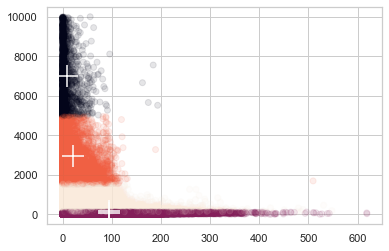

Benötigte Systemzeit: 78.369s


In [21]:
start_proc = time.process_time()

# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(df_numpy)

# plot result
#f, axes = plt.subplots(1, 2, figsize=(11,5))
#axes[0].scatter(X[:,0], X[:,1], alpha=.1)
plt.scatter(df_numpy[:,0], df_numpy[:,1], c=fcm_labels, alpha=.1)
plt.scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='w')
#plt.savefig('images/basic-clustering-output.jpg')
plt.show()

ende_proc = time.process_time()
print('Benötigte Systemzeit: {:5.3f}s'.format(ende_proc-start_proc))